In [1]:
# Import Libraries 


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Reading the dataset

dataset = pd.read_csv('Mapping_Police_Violence.csv')
dataset.shape

(12806, 61)

In [3]:
unknown_race_count = dataset['race'].value_counts()['Unknown race']
print("Number of rows with 'Unknown race':", unknown_race_count)

Number of rows with 'Unknown race': 1247


In [4]:
# Filter rows where race is not 'Unknown race'
dataset = dataset[dataset['race'] != 'Unknown race']

# Print the updated DataFrame shape
print("Updated DataFrame shape after removing rows with 'Unknown race':", dataset.shape)

Updated DataFrame shape after removing rows with 'Unknown race': (11559, 61)


In [5]:
# Removing columns that are not required


columns_to_remove = ['victim_image', 'street_address','city','county','zip','ori','news_urls','call_for_service','tract','urban_rural_uspsai',
                     'wapo_id','fe_id','officer_names','officer_known_past_shootings','urban_rural_nchs','hhincome_median_census_tract',
                     'latitude','longitude','pop_total_census_tract','pop_white_census_tract','pop_black_census_tract','pop_native_american_census_tract',
                     'pop_asian_census_tract','pop_pacific_islander_census_tract','pop_other_multiple_census_tract','pop_hispanic_census_tract',
                     'congressional_district_113','congressperson_lastname','congressperson_firstname','congressperson_party','prosecutor_head',
                     'prosecutor_party','prosecutor_term','prosecutor_in_court','prosecutor_special','independent_investigation',
                     'prosecutor_url','disposition_official','officer_charged','geography']
dataset.drop(columns=columns_to_remove,inplace=True)
# columns_to_remove = ['victim_image', 'street_address','city','county','zip','ori','news_urls','call_for_service','tract','urban_rural_uspsai',
#                      'wapo_id','fe_id','officer_names','officer_races','officer_known_past_shootings','urban_rural_nchs','hhincome_median_census_tract',
#                      'latitude','longitude','pop_total_census_tract','pop_white_census_tract','pop_black_census_tract','pop_native_american_census_tract',
#                      'pop_asian_census_tract','pop_pacific_islander_census_tract','pop_other_multiple_census_tract','pop_hispanic_census_tract',
#                      'congressional_district_113','congressperson_lastname','congressperson_firstname','congressperson_party','prosecutor_head',
#                      'prosecutor_race','prosecutor_gender','prosecutor_party','prosecutor_term','prosecutor_in_court','prosecutor_special','independent_investigation',
#                      'prosecutor_url','disposition_official','officer_charged','off_duty_killing','geography']
dataset.shape

(11559, 21)

removing dae, circumsances

In [6]:
import pandas as pd

# Assuming your dataset is stored in a DataFrame called 'data'
# Drop the 'date' and 'circumstances' columns
dataset.drop(['date', 'circumstances', 'wapo_body_camera', 'initial_reason', 'agency_responsible', 'name'], axis=1, inplace=True)


In [7]:
dataset.head(20)

,age,gender,race,state,cause_of_death,signs_of_mental_illness,allegedly_armed,wapo_armed,wapo_threat_level,wapo_flee,off_duty_killing,encounter_type,officer_races,prosecutor_race,prosecutor_gender
2,62.0,Male,White,SC,Gunshot,Yes,Allegedly Armed,NaN,Brandished Weapon,Car,NaN,Traffic Stop,NaN,NaN,NaN
3,25.0,Male,White,TN,Gunshot,Yes,Allegedly Armed,Knife,Brandished Weapon,Not Fleeing,NaN,Mental Health/Welfare Check,NaN,NaN,NaN
4,30.0,Male,Black,TN,Gunshot,No,Unarmed/Did Not Have Actual Weapon,NaN,Sudden Threatening Movement,NaN,NaN,Traffic Stop,NaN,NaN,NaN
6,39.0,Male,Native American,ID,Gunshot,No,Unarmed/Did Not Have Actual Weapon,NaN,NaN,"Car, Foot",NaN,Other Non-Violent Offense,NaN,NaN,NaN
7,42.0,Male,White,KY,Gunshot,No,Unclear,NaN,Undetermined,Not Fleeing,NaN,None/Unknown,NaN,NaN,NaN
8,67.0,Male,White,MN,Gunshot,No,Allegedly Armed,Pipe,Brandished Weapon,Not Fleeing,NaN,Traffic Stop,NaN,NaN,NaN
9,31.0,Male,Hispanic,TX,Gunshot,Yes,Allegedly Armed,Knife,Attack,Not Fleeing,NaN,Part 1 Violent Crime,NaN,NaN,NaN
11,36.0,Male,White,AR,Gunshot,Drug or Alcohol Use,Allegedly Armed,NaN,Brandished Weapon,Not Fleeing,NaN,Person with a Weapon,NaN,NaN,NaN
14,NaN,Male,Black,TX,Gunshot,No,Allegedly Armed,NaN,Used Weapon,Not Fleeing,NaN,Part 1 Violent Crime,NaN,NaN,NaN
15,52.0,Male,White,WI,Gunshot,No,Allegedly Armed,NaN,Brandished Weapon,Not Fleeing,NaN,Person with a Weapon,NaN,NaN,NaN


In [8]:
# Check for NaN values in each column
columns_with_nan = dataset.columns[dataset.isna().any()].tolist()

# Print columns with NaN values
print("Columns with NaN values:", columns_with_nan)


Columns with NaN values: ['age', 'gender', 'race', 'cause_of_death', 'signs_of_mental_illness', 'allegedly_armed', 'wapo_armed', 'wapo_threat_level', 'wapo_flee', 'off_duty_killing', 'encounter_type', 'officer_races', 'prosecutor_race', 'prosecutor_gender']


<h2>Replacing NaN values

In [9]:
# Import pandas library
import pandas as pd

# Replace NaN values with appropriate strategies
dataset['age'].fillna(dataset['age'].median(), inplace=True)
dataset['race'].fillna(dataset['race'].mode()[0], inplace=True)
dataset['cause_of_death'].fillna(dataset['cause_of_death'].mode()[0], inplace=True)
dataset['signs_of_mental_illness'].fillna(dataset['signs_of_mental_illness'].mode()[0], inplace=True)
dataset['wapo_flee'].fillna(dataset['wapo_flee'].mode()[0], inplace=True)
dataset['off_duty_killing'].fillna('Not known', inplace=True)
dataset['encounter_type'].fillna(dataset['encounter_type'].mode()[0], inplace=True)
dataset['prosecutor_race'].fillna(dataset['prosecutor_race'].mode()[0], inplace=True)
dataset['prosecutor_gender'].fillna(dataset['prosecutor_gender'].mode()[0], inplace=True)

C:\Users\waheed.anwar\AppData\Local\Temp\ipykernel_17432\1652911823.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['age'].fillna(dataset['age'].median(), inplace=True)
C:\Users\waheed.anwar\AppData\Local\Temp\ipykernel_17432\1652911823.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always b

<h2>Analyzing redundant classes of columns for cleaning

In [10]:
columns_to_check = ['age', 'state', 'signs_of_mental_illness', 'wapo_flee', 'prosecutor_race', 'prosecutor_gender', 'race', 'off_duty_killing']

for column in columns_to_check:
    unique_values = dataset[column].unique()
    print(f"Unique values in column '{column}':")
    print(unique_values)
    print()


Unique values in column 'age':
[ 62.  25.  30.  39.  42.  67.  31.  36.  35.  52.  32.  37.  43.  54.
  23.  50.  28.  58.  69.  34.  40.  26.  41.  53.  85.  44.  51.  63.
  33.  29.  46.  55.  27.  45.  19.  49.  65.  17.  47.  59.  18.  38.
  75.  24.  48.  81.  73.  66.  61.  16.  56.  20.  10.  12.  21.  57.
  60.  22.   5.  78.  79.  68.  64.  13.  15.  71.  82.  88.  14.  86.
  76.  77.  83.  72.  70.  74.   1.   2.  84.  80.   8.  91.  11.  92.
   6.   7.   9.  95.  93. 107.  89.]

Unique values in column 'state':
['SC' 'TN' 'ID' 'KY' 'MN' 'TX' 'AR' 'WI' 'CO' 'CA' 'MO' 'FL' 'AZ' 'IL'
 'NC' 'NY' 'GA' 'MT' 'PA' 'OH' 'MS' 'NM' 'NV' 'WA' 'KS' 'MI' 'WY' 'LA'
 'NE' 'AL' 'NJ' 'CT' 'MD' 'ME' 'HI' 'IN' 'DC' 'NH' 'VA' 'UT' 'OR' 'IA'
 'MA' 'AK' 'OK' 'WV' 'DE' 'ND' 'RI' 'VT' 'SD']

Unique values in column 'signs_of_mental_illness':
['Yes' 'No' 'Drug or Alcohol Use' 'Unknown'
 'History of Drug or Alcohol Use']

Unique values in column 'wapo_flee':
['Car' 'Not Fleeing' 'Car, Foot' 'Foot' 'Ot

<h4>Fixing signs_of_mental_illness column.<br>
-> Combining 'Drug or Alcohol Use' and 'History of Drug or Alcohol Use' into single column<br>
-> Replacing unknown with mode values<br>

In [11]:
# Replace 'Drug or Alcohol Use' and 'History of Drug or Alcohol Use' with 'Drug or Alcohol Use'
dataset['signs_of_mental_illness'].replace({'Drug or Alcohol Use': 'Drug or Alcohol Use',
                                            'History of Drug or Alcohol Use': 'Drug or Alcohol Use'}, inplace=True)

# Replace 'Unknown' with the mode value (most frequent value)
mode_value = dataset['signs_of_mental_illness'].mode()[0]
dataset['signs_of_mental_illness'].replace({'Unknown': mode_value}, inplace=True)

# Print unique values after fixing the column
print("Unique values in column 'signs_of_mental_illness' after fixing:")
print(dataset['signs_of_mental_illness'].unique())


Unique values in column 'signs_of_mental_illness' after fixing:
['Yes' 'No' 'Drug or Alcohol Use']


<h4>Fixing 'wapo_flee' column.<br>
-> 'Car, foot' to Car<br>
-> 'Foot,Car' to Car<br>
-> 'Motorcycle,Foot' to Motorcycle<br>
-> and other to the mode<br>

In [12]:
# Replace specified combinations of values
dataset['wapo_flee'].replace({'Car, Foot': 'Car', 'Foot, Car': 'Car', 'Motorcycle, Foot': 'Motorcycle'}, inplace=True)

# Replace 'Other' with the mode value
mode_value = dataset['wapo_flee'].mode()[0]
dataset['wapo_flee'].replace({'Other': mode_value}, inplace=True)

# Print unique values after fixing the column
print("Unique values in column 'wapo_flee' after fixing:")
print(dataset['wapo_flee'].unique())


Unique values in column 'wapo_flee' after fixing:
['Car' 'Not Fleeing' 'Foot' 'Motorcycle' 'bicycle' 'tractor' 'ATV']


<h4>Fixing 'prosecutor_race' column: <br> -> by replacing 'White, White' with White

In [13]:
# Replace 'White, White' with 'White'
dataset['prosecutor_race'].replace({'White, White': 'White'}, inplace=True)

# Print unique values after fixing the column
print("Unique values in column 'prosecutor_race' after fixing:")
print(dataset['prosecutor_race'].unique())

Unique values in column 'prosecutor_race' after fixing:
['White' 'Black' 'Hispanic' 'Pacific Islander' 'Asian']


<h4>Fixing race column: <br> 
-> changing 'Native Hawaiian and Pacific Islander' to Pacific Islander 

In [14]:
# Replace 'Native Hawaiian and Pacific Islander' with 'Pacific Islander'
dataset['race'].replace({'Native Hawaiian and Pacific Islander': 'Pacific Islander'}, inplace=True)

# Print unique values after fixing the column
print("Unique values in column 'race' after fixing:")
print(dataset['race'].unique())


Unique values in column 'race' after fixing:
['White' 'Black' 'Native American' 'Hispanic' 'Asian' 'Pacific Islander']


<h1>Encoding string based columns

In [15]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Apply label encoding and add 1 to the encoded values
dataset['signs_of_mental_illness'] = label_encoder.fit_transform(dataset['signs_of_mental_illness']) + 1
dataset['allegedly_armed'] = label_encoder.fit_transform(dataset['allegedly_armed']) + 1
dataset['wapo_armed'] = label_encoder.fit_transform(dataset['wapo_armed']) + 1
dataset['wapo_threat_level'] = label_encoder.fit_transform(dataset['wapo_threat_level']) + 1
dataset['wapo_flee'] = label_encoder.fit_transform(dataset['wapo_flee']) + 1
dataset['off_duty_killing'] = label_encoder.fit_transform(dataset['off_duty_killing']) + 1
dataset['encounter_type'] = label_encoder.fit_transform(dataset['encounter_type']) + 1

dataset['officer_races'] = label_encoder.fit_transform(dataset['officer_races']) + 1
dataset['cause_of_death'] = label_encoder.fit_transform(dataset['cause_of_death']) + 1
dataset['prosecutor_gender'] = label_encoder.fit_transform(dataset['prosecutor_gender']) + 1
dataset['prosecutor_race'] = label_encoder.fit_transform(dataset['prosecutor_race']) + 1

dataset['gender'] = label_encoder.fit_transform(dataset['gender']) + 1
dataset['state'] = label_encoder.fit_transform(dataset['state']) + 1

<h3>Preparing race column for one vs rest comparison

In [16]:
dataset['race_binary'] = dataset['race'].apply(lambda x: 1 if x.lower() == 'black' else 0)
dataset.drop(columns=['race'], inplace=True)
dataset.rename(columns={'race_binary': 'race'}, inplace=True)

<h3>Analyzing correlations between 'race' and other columns

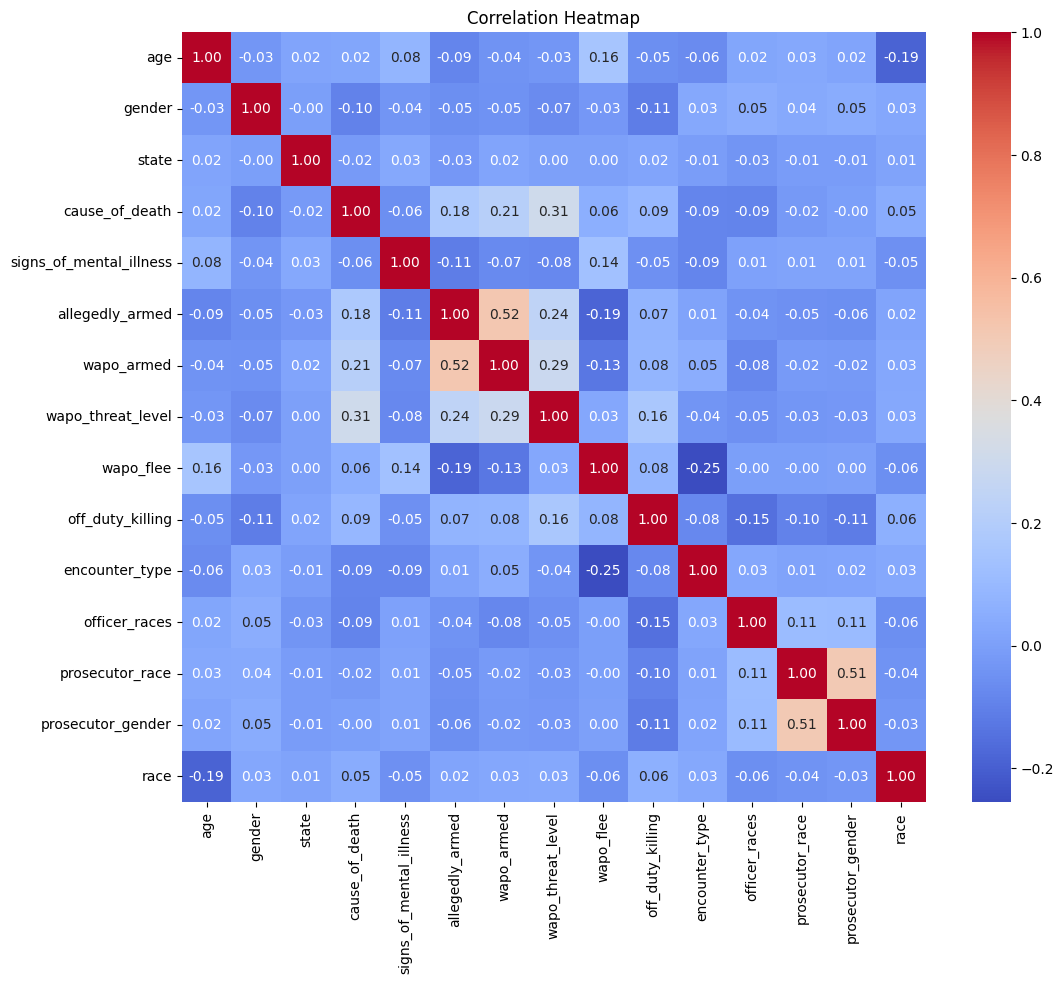

In [17]:
corr_matrix = dataset.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

<h2>Train-Test Split<br>
<h3>The variables we choose are: <br> <h4><i>'age', 'state', 'signs_of_mental_illness', 'wapo_flee', 'prosecutor_race', 'gender','wapo_threat_level', 'off_duty_killing'.<i>

In [18]:
X = dataset[['age', 'state', 'signs_of_mental_illness', 'wapo_flee', 'prosecutor_race', 'gender','wapo_threat_level', 'off_duty_killing']]
y = dataset['race']

# Split the datasetset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((9247, 8), (2312, 8), (9247,), (2312,))

<h2> Running logistic regression to train our model in predicting black race incidents
<h4><i>OVR strategy<i><h4> 

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Create an instance of Logistic Regression Classifier
clf = LogisticRegression(multi_class='ovr', solver='liblinear')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict the race on the test data
y_pred = clf.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test.values, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7205882352941176


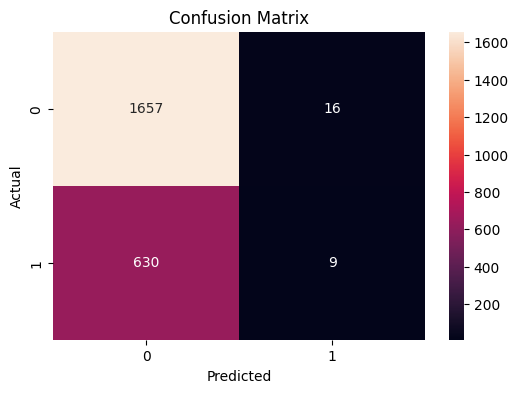


Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.99      0.84      1673
           1       0.36      0.01      0.03       639

    accuracy                           0.72      2312
   macro avg       0.54      0.50      0.43      2312
weighted avg       0.62      0.72      0.61      2312



In [20]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=[i for i in np.unique(y_test)], columns=[i for i in np.unique(y_test)])

plt.figure(figsize=(6,4))

# Create a heatmap from the DataFrame
sns.heatmap(cm_df, annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Generate the classification report
report = classification_report(y_test, y_pred)
print("\nClassification Report:\n", report)

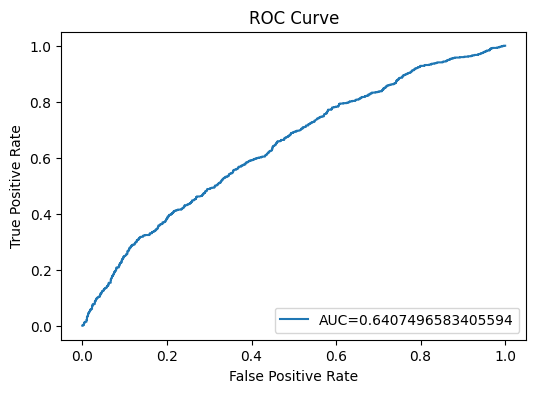

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities with the `predict_proba` function
y_pred_proba = clf.predict_proba(X_test)[::,1]

# Compute the ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)

# Compute the AUC score
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(6,4))

# Plot the ROC curve
plt.plot(fpr, tpr, label="AUC="+str(auc))

plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add a legend
plt.legend(loc=4)

plt.show()

<h1> Next Experiment:  SMOTE (Synthetic Minority Over-sampling Technique) </h1>

<h5> While we achieved a high accuracy for the initial experiment, it is not a good indicator of performance for the aforementioned reasons. In this experiment, we will be using SMOTE to mitigate class imbalances and re-evaluate our logistic regression model with our revised balanced dataset. Moreover, we will be using the 'saga' solver, or the Stochastic Average Gradient descent with Augmented factorization and Intrinsic momentum. It's a variation of the sag solver that also supports the non-smooth penalty='l1' option which we have commonly referred to in class as the L1 Lasso Regularization technique. Given our dataset, this is the best choice as it handles sparse multinomial logistic regression effectively and is very fast for datasets of considerable size.</h5>

In [23]:
from imblearn.over_sampling import SMOTE

# Create an instance of SMOTE
smote = SMOTE(random_state=65)

# Fit SMOTE on the training data
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Create an instance of Logistic Regression Classifier with 'saga' solver and 'l1' penalty
clf2 = LogisticRegression(multi_class='ovr', solver='saga', penalty='l1', max_iter=10000)

# Train the classifier on the balanced training data
clf2.fit(X_train_smote, y_train_smote)

# Predict the race on the test data
y_pred2 = clf2.predict(X_test)

# Calculate the accuracy of the classifier
accuracy2 = accuracy_score(y_test.values, y_pred2)
print("Accuracy:", accuracy2)

Accuracy: 0.5700692041522492


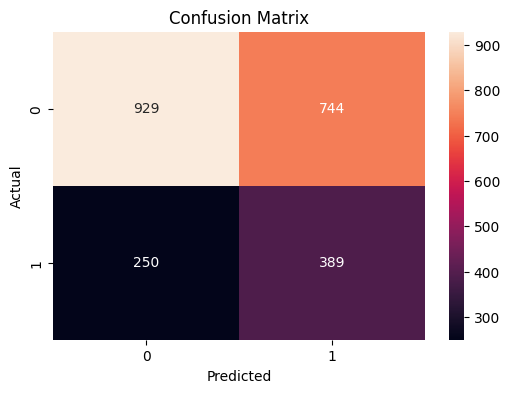


Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.56      0.65      1673
           1       0.34      0.61      0.44       639

    accuracy                           0.57      2312
   macro avg       0.57      0.58      0.55      2312
weighted avg       0.67      0.57      0.59      2312



In [24]:
# Generate the confusion matrix
cm2 = confusion_matrix(y_test, y_pred2)

# Create a DataFrame from the confusion matrix
cm_df2 = pd.DataFrame(cm2, index=[i for i in np.unique(y_test)], columns=[i for i in np.unique(y_test)])

plt.figure(figsize=(6,4))

# Create a heatmap from the DataFrame
sns.heatmap(cm_df2, annot=True, fmt='g')

plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Generate the classification report
report2 = classification_report(y_test, y_pred2)
print("\nClassification Report:\n", report2)

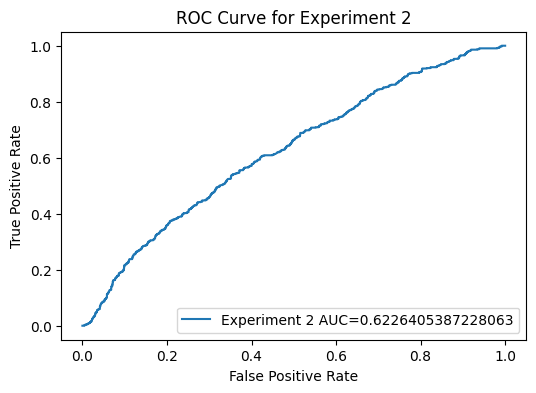

In [25]:
from sklearn.metrics import roc_curve, roc_auc_score

# Compute predicted probabilities with the `predict_proba` function
y_pred_proba2 = clf2.predict_proba(X_test)[::,1]

# Compute the ROC curve
fpr2, tpr2, _ = roc_curve(y_test, y_pred_proba2)

# Compute the AUC score
auc2 = roc_auc_score(y_test, y_pred_proba2)

plt.figure(figsize=(6,4))

# Plot the ROC curve
plt.plot(fpr2, tpr2, label="Experiment 2 AUC="+str(auc2))

plt.title('ROC Curve for Experiment 2')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# Add a legend
plt.legend(loc=4)

plt.show()